In [13]:
import random
import statistics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Otimizações realizadas no código

- Desgaste de Pneus e Combustível: lógica onde o desgaste dos pneus e o consumo de combustível afetam progressivamente a performance dos carros ao longo das voltas.

- Condições Meteorológicas Dinâmicas: condições da pista mudam durante a corrida, influenciando a escolha de pneus e estratégias.

- Pit Stops: Adicionar a estratégia de pit stops que podem ser necessários para troca de pneus ou reabastecimento.

- Falhas Mecânicas Aleatórias: chance de falhas mecânicas com base na confiabilidade do carro.

- Penalidades: penalidades por infrações de corrida.

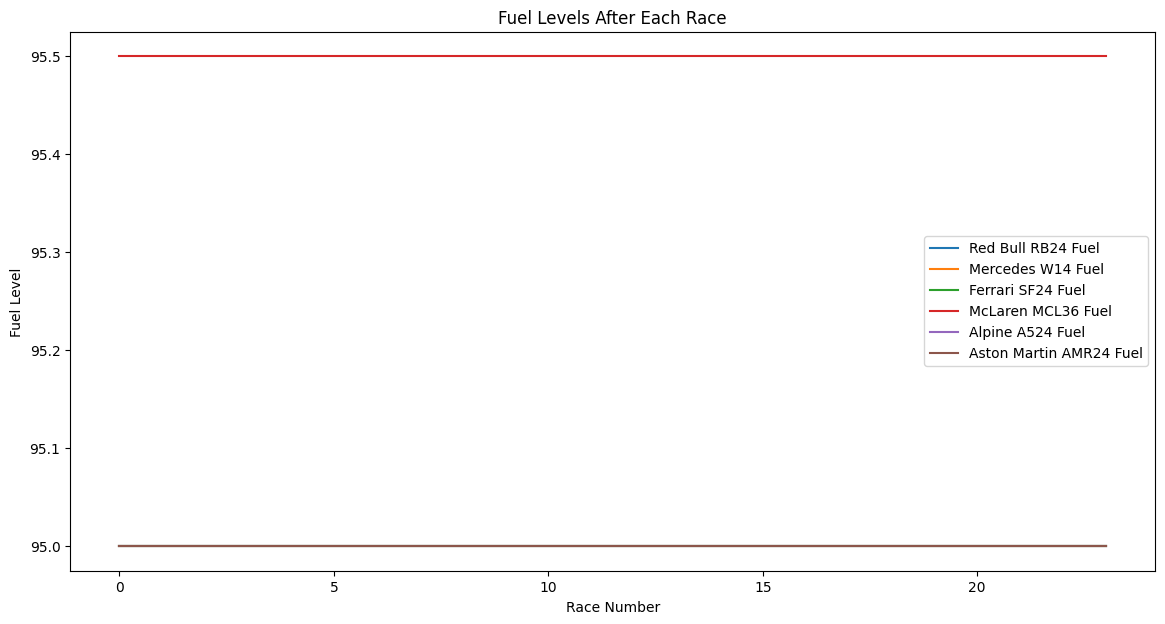

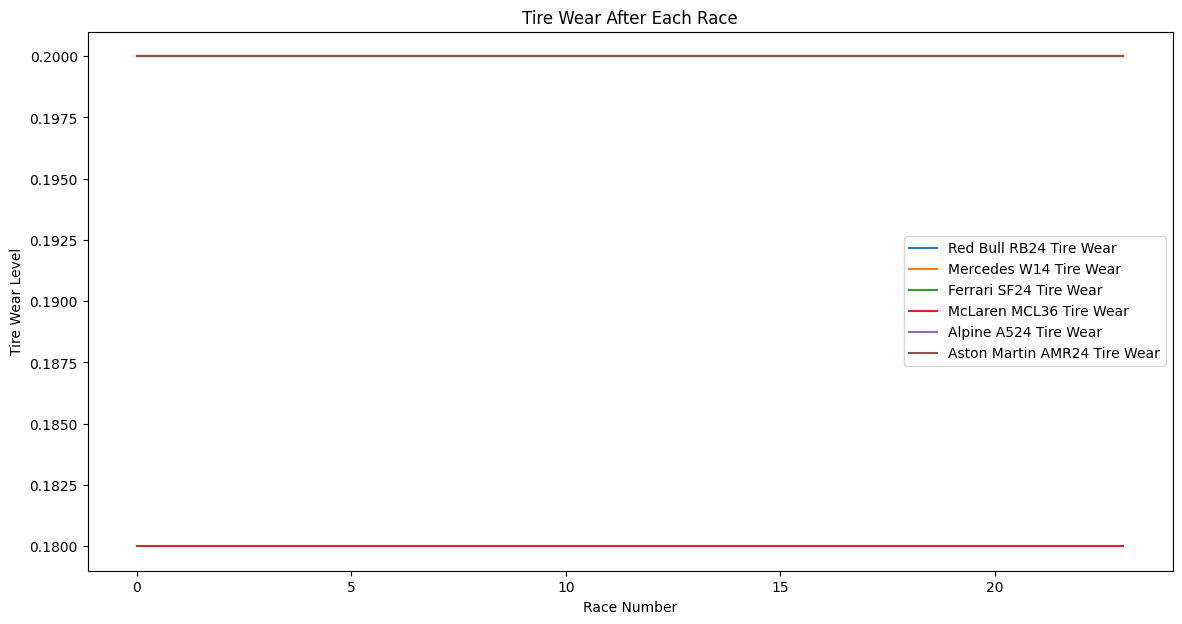

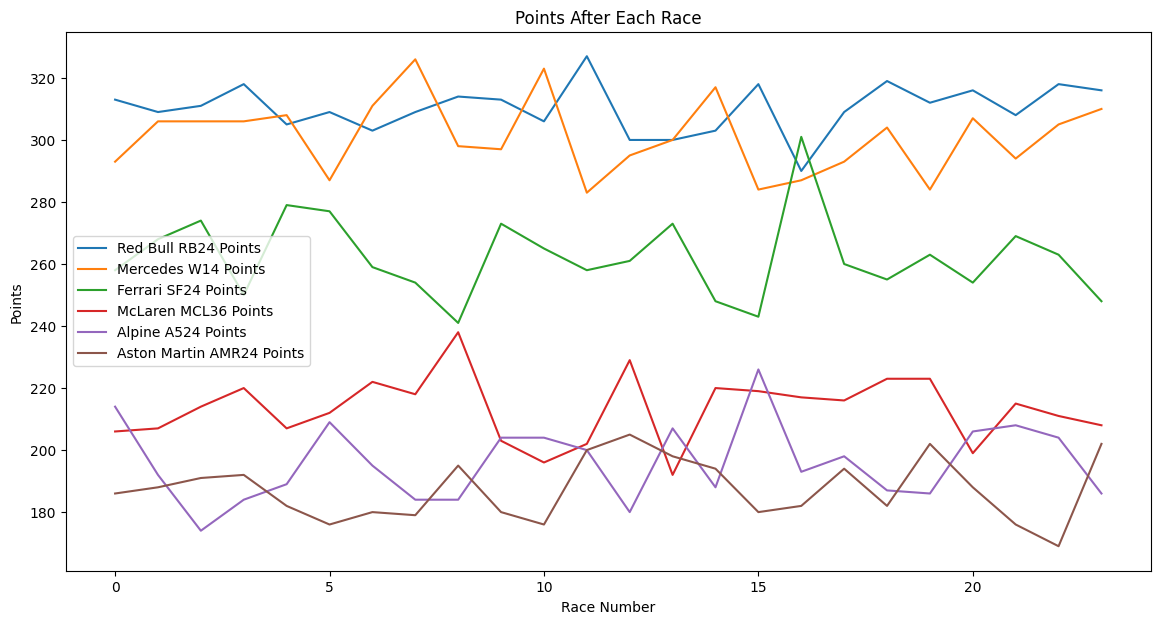

In [16]:
import matplotlib.pyplot as plt

def visualize_race_data(championship_results, cars):
    """Estado dos carros após cada corrida do campeonato."""
    num_races = len(championship_results)
    car_names = [car.name for car in cars]
    fuel_levels = {car.name: [] for car in cars}
    tire_wear = {car.name: [] for car in cars}
    points = {car.name: [] for car in cars}

    for race_result in championship_results:
        condition, tire, results = race_result
        for car in cars:
            fuel_levels[car.name].append(car.fuel_level)
            tire_wear[car.name].append(car.tire_wear)
            points[car.name].append(results[car.name])

    # Plotting fuel levels
    plt.figure(figsize=(14, 7))
    for name in car_names:
        plt.plot(range(num_races), fuel_levels[name], label=f'{name} Fuel')
    plt.title('Fuel Levels After Each Race')
    plt.xlabel('Race Number')
    plt.ylabel('Fuel Level')
    plt.legend()
    plt.show()

    # Plotting tire wear
    plt.figure(figsize=(14, 7))
    for name in car_names:
        plt.plot(range(num_races), tire_wear[name], label=f'{name} Tire Wear')
    plt.title('Tire Wear After Each Race')
    plt.xlabel('Race Number')
    plt.ylabel('Tire Wear Level')
    plt.legend()
    plt.show()

    # Plotting points
    plt.figure(figsize=(14, 7))
    for name in car_names:
        plt.plot(range(num_races), points[name], label=f'{name} Points')
    plt.title('Points After Each Race')
    plt.xlabel('Race Number')
    plt.ylabel('Points')
    plt.legend()
    plt.show()

def main():
    cars = [
        F1Car("Red Bull RB24", 330, 3.8, 0.98, 100),
        F1Car("Mercedes W14", 329, 3.6, 0.99, 100),
        F1Car("Ferrari SF24", 325, 3.9, 0.97, 100),
        F1Car("McLaren MCL36", 320, 3.7, 0.95, 100),
        F1Car("Alpine A524", 318, 3.6, 0.94, 100),
        F1Car("Aston Martin AMR24", 317, 3.4, 0.93, 100)

    ]
    championship_results, wins_count, total_scores = championship(cars)
    win_probabilities = analyze_results(championship_results, wins_count, cars)


    visualize_race_data(championship_results, cars)

if __name__ == "__main__":
    main()

Probabilidade de Vitória de Cada Carro:
Red Bull RB24: 58.33%
Mercedes W14: 41.67%
Ferrari SF24: 0.00%
McLaren MCL36: 0.00%
Alpine A524: 0.00%
Aston Martin AMR24: 0.00%
Alfa Romeo C44: 0.00%
Haas VF-24: 0.00%
AlphaTauri AT04: 0.00%
Williams FW46: 0.00%


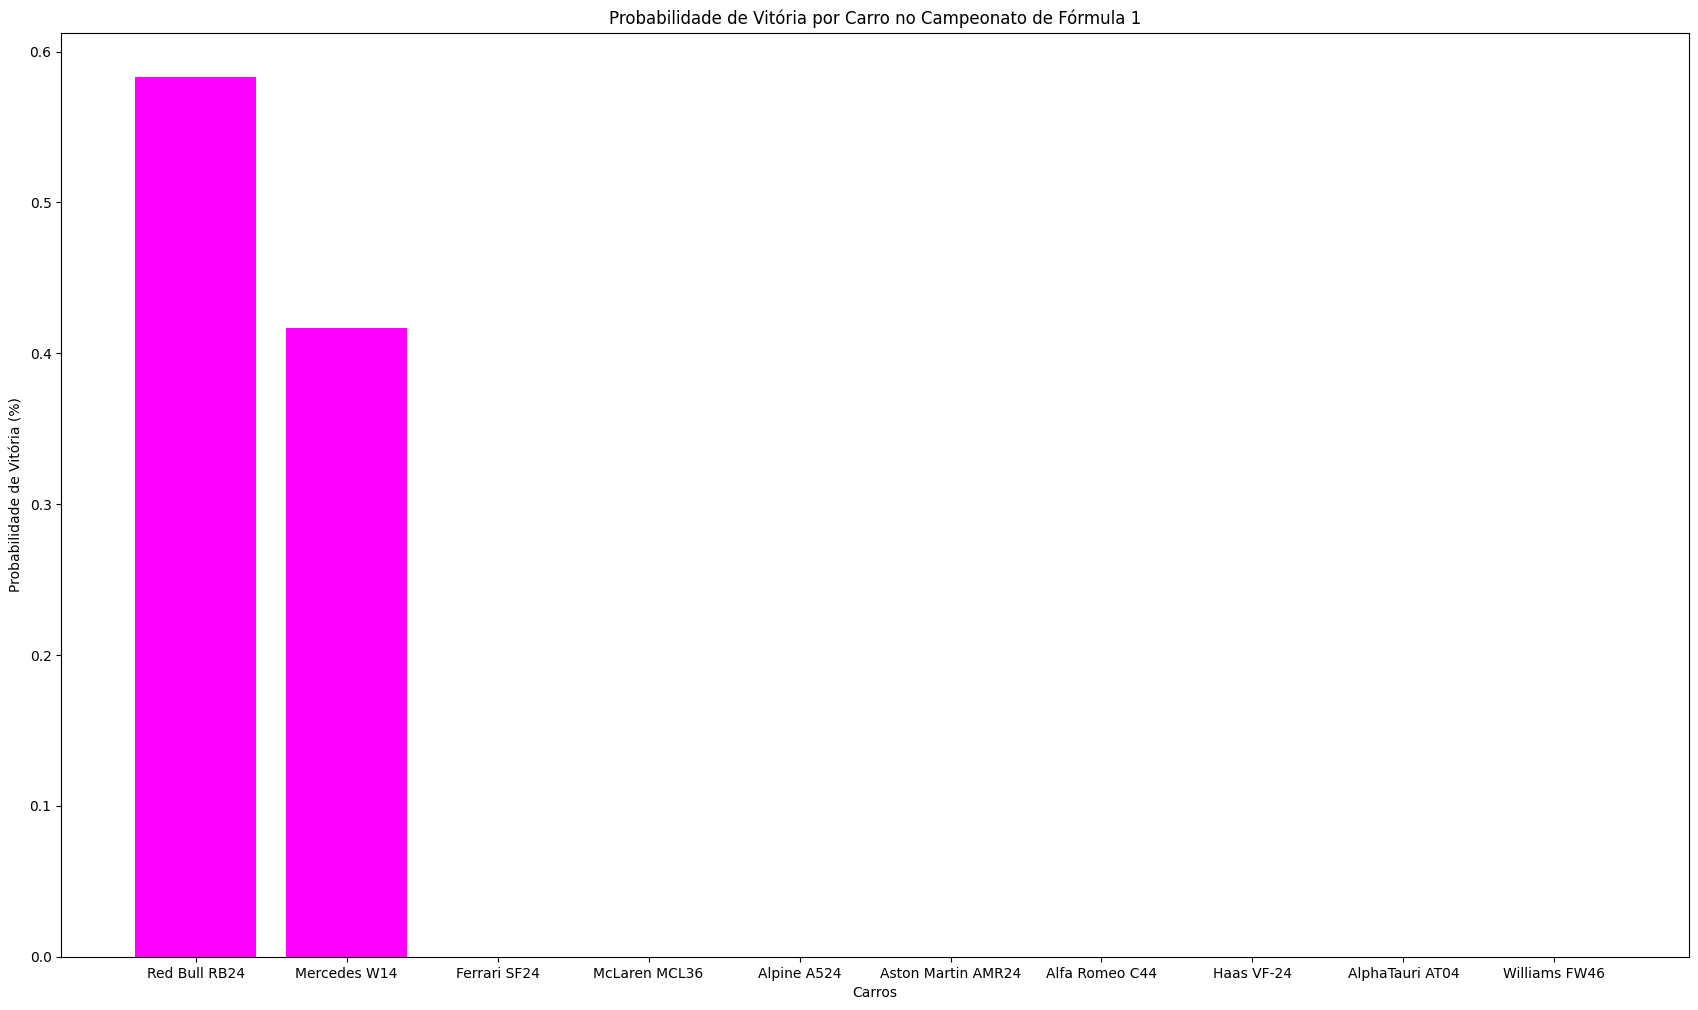

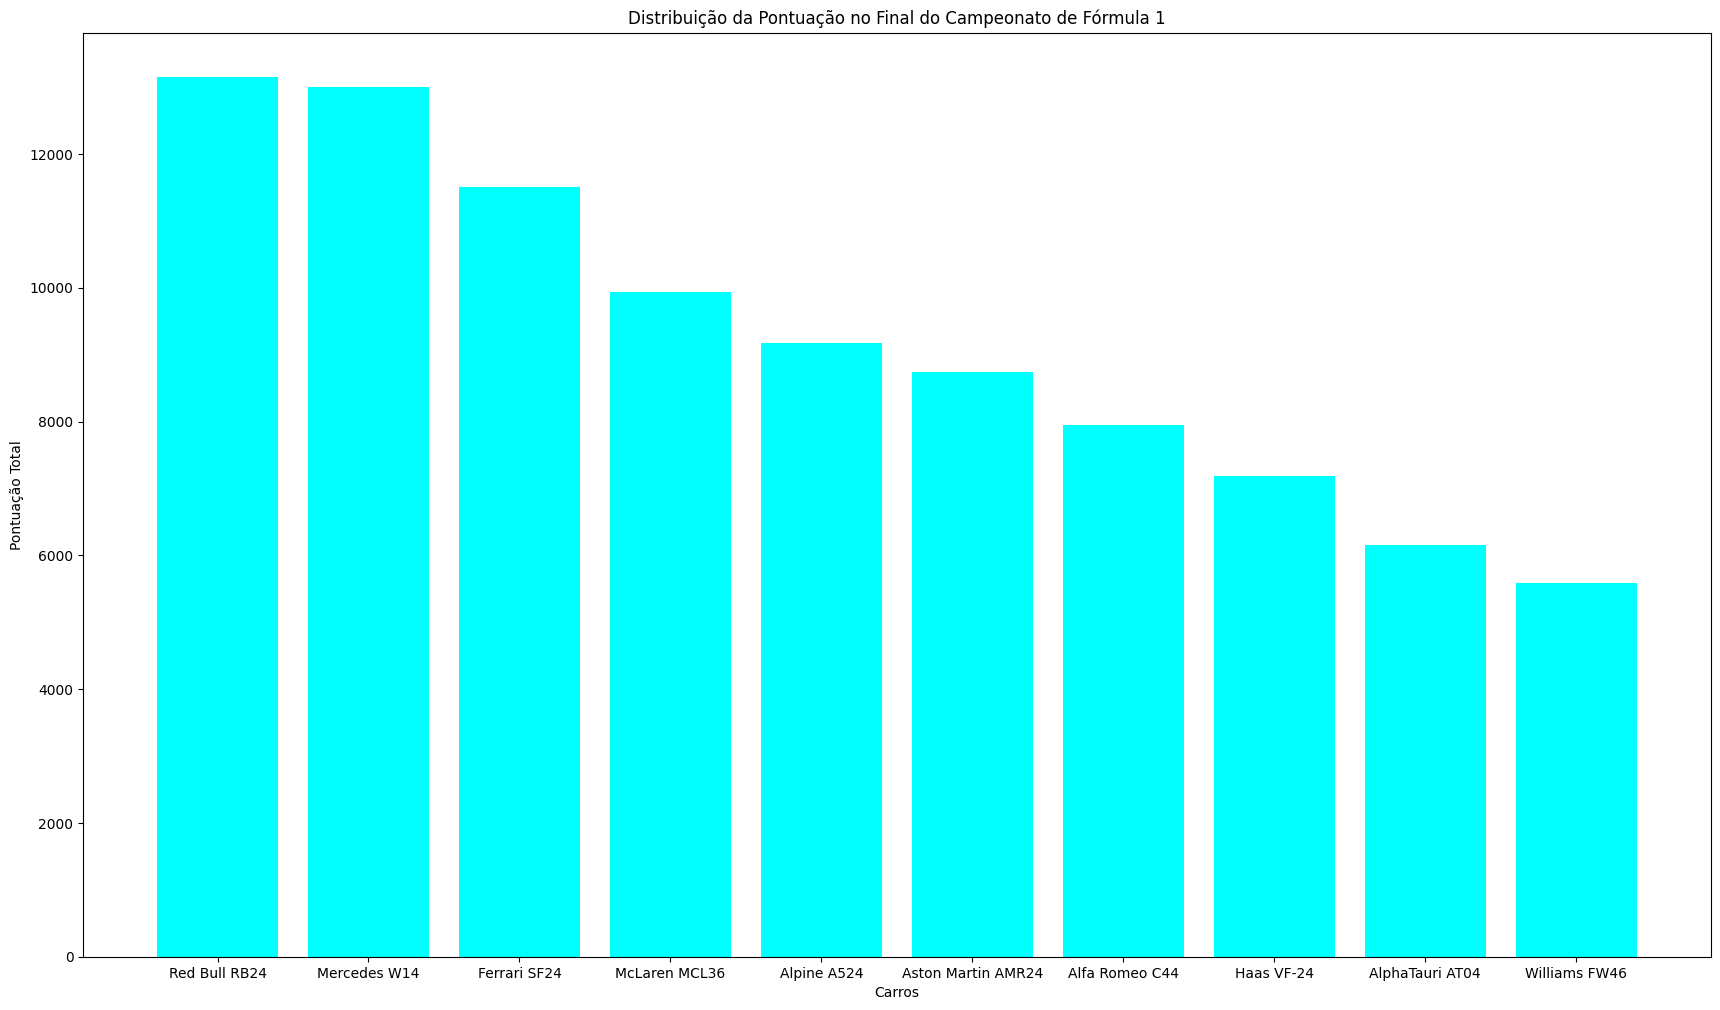

In [15]:

class F1Car:
    def __init__(self, name, max_speed, acceleration, reliability, fuel_capacity):
        self.name = name
        self.max_speed = max_speed
        self.acceleration = acceleration
        self.reliability = reliability
        self.fuel_capacity = fuel_capacity
        self.fuel_level = fuel_capacity
        self.tire_wear = 0

    def simulate_lap_time(self, track_condition, tire_choice, lap_number):
        if random.random() > self.reliability:
            return float('inf')  # Simula falha mecânica
        if self.fuel_level <= 0:
            return float('inf')  # Fica sem combustível

        speed_adjustment = random.uniform(0.95, 1.05)
        tire_effect = tire_choice * random.uniform(0.9, 1.1) / (1 + self.tire_wear * 0.05)
        fuel_effect = 1 + (self.fuel_capacity - self.fuel_level) / self.fuel_capacity * 0.1

        # Atualiza o estado do carro
        self.fuel_level -= 0.5  # Consumo de combustível por volta
        self.tire_wear += 0.02  # Desgaste dos pneus por volta

        return (120 + (200 - self.max_speed * speed_adjustment) * tire_effect) * fuel_effect

    def pit_stop(self, tire_type, refuel=True):
        """Carro entra para pit stop para troca de pneus e reabastecimento."""
        self.tire_wear = 0
        if refuel:
            self.fuel_level = self.fuel_capacity

class Race:
    def __init__(self, cars, num_laps=70):
        self.cars = cars
        self.num_laps = num_laps
        self.track_conditions = ['Dry', 'Wet', 'Icy']
        self.tires = {
            'Dry': {'Soft': 0.95, 'Medium': 1.0, 'Hard': 1.05},
            'Wet': {'Rain': 0.95},
            'Icy': {'Rain': 1.2, 'Hard': 1.5}
        }

    def run_race(self):
        results = {car.name: 0 for car in self.cars}
        track_condition = random.choice(self.track_conditions)
        tire_choice = random.choice(list(self.tires[track_condition].keys()))
        for lap in range(self.num_laps):
            if lap % 20 == 0 and lap > 0:  # Pit stop a cada 20 voltas
                for car in self.cars:
                    car.pit_stop(tire_choice)

            lap_times = {car.name: car.simulate_lap_time(track_condition, self.tires[track_condition][tire_choice], lap) for car in self.cars}
            sorted_lap_times = sorted(lap_times.items(), key=lambda x: x[1])
            for i, (car_name, _) in enumerate(sorted_lap_times):
                results[car_name] += len(self.cars) - i
        return track_condition, tire_choice, results

def championship(cars, num_races=24):
    championship_results = []
    wins_count = {car.name: 0 for car in cars}
    total_scores = {car.name: 0 for car in cars}
    for _ in range(num_races):
        race = Race(cars)
        condition, tire, results = race.run_race()
        first_place = max(results, key=results.get)
        wins_count[first_place] += 1
        for car_name, score in results.items():
            total_scores[car_name] += score
        championship_results.append((condition, tire, results))
    return championship_results, wins_count, total_scores

def analyze_results(championship_results, wins_count, cars):
    total_races = len(championship_results)
    win_probabilities = {car.name: wins_count[car.name] / total_races for car in cars}
    sorted_win_probs = sorted(win_probabilities.items(), key=lambda x: x[1], reverse=True)
    return sorted_win_probs

def main():
    cars = [
        F1Car("Red Bull RB24", 330, 3.8, 0.98, 100),
        F1Car("Mercedes W14", 329, 3.6, 0.99, 100),
        F1Car("Ferrari SF24", 325, 3.9, 0.97, 100),
        F1Car("McLaren MCL36", 320, 3.7, 0.95, 100),
        F1Car("Alpine A524", 318, 3.6, 0.94, 100),
        F1Car("Aston Martin AMR24", 317, 3.4, 0.93, 100),
        F1Car("Alfa Romeo C44", 315, 3.5, 0.92, 100),
        F1Car("Haas VF-24", 313, 3.3, 0.90, 100),
        F1Car("AlphaTauri AT04", 310, 3.4, 0.88, 100),
        F1Car("Williams FW46", 308, 3.2, 0.86, 100)
    ]
    results, wins_count, total_scores = championship(cars)
    win_probabilities = analyze_results(results, wins_count, cars)

    # Probabilidades de vitória
    print("Probabilidade de Vitória de Cada Carro:")
    for car, probability in win_probabilities:
        print(f"{car}: {probability:.2%}")

    # Visualização gráfica das probabilidades de vitória
    plt.figure(figsize=(21, 12))
    plt.bar([car for car, _ in win_probabilities], [prob for _, prob in win_probabilities], color='magenta')
    plt.xlabel('Carros')
    plt.ylabel('Probabilidade de Vitória (%)')
    plt.title('Probabilidade de Vitória por Carro no Campeonato de Fórmula 1')
    plt.show()

    plt.figure(figsize=(21, 12))
    plt.bar(total_scores.keys(), total_scores.values(), color='cyan')
    plt.xlabel('Carros')
    plt.ylabel('Pontuação Total')
    plt.title('Distribuição da Pontuação no Final do Campeonato de Fórmula 1')
    plt.show()

if __name__ == "__main__":
    main()